In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

## import titanic set

In [2]:
#Importing essential libraries
!pip install -U -q PyDrive
 
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
 
 
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)



In [3]:
pip install wget

  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9675 sha256=d86ea77e5ba9733a9eb4ecf9fff3b330f19ee834d7be1566dd0ea633b12bfcd9
  Stored in directory: /root/.cache/pip/wheels/a1/b6/7c/0e63e34eb06634181c63adacca38b79ff8f35c37e3c13e3c02
Successfully built wget


In [4]:
import pandas as pd

df1 = 'https://drive.google.com/file/d/1zZlcn-WXf_KOl0rcwON_v7XxnxLm_bv9/view?usp=sharing'
df2 = 'https://drive.google.com/file/d/1XIOPNGaMu3rStwMHMz65LFo4vhyyEznN/view?usp=sharing'
df3 = 'https://drive.google.com/file/d/1m3Iv4lyEfQtkBVRbHdGeRRvNanHPGSi-/view?usp=sharing'
df4 = 'https://drive.google.com/file/d/1JrZyhGW95soNr9mwoLZzqxl9of2TjSxa/view?usp=sharing'
# to get the id part of the file
id = df1.split("/")[-2]
id2 = df2.split("/")[-2]
id3 = df3.split("/")[-2]
id4 = df4.split("/")[-2]

 
downloaded = drive.CreateFile({'id':id})
downloaded.GetContentFile('test_X.csv') 
X_test = pd.read_csv('test_X.csv')

downloaded = drive.CreateFile({'id':id2})
downloaded.GetContentFile('test_Y.csv') 
Y_test = pd.read_csv('test_Y.csv')

downloaded = drive.CreateFile({'id':id3})
downloaded.GetContentFile('train_X.csv') 
X_train = pd.read_csv('train_X.csv')

downloaded = drive.CreateFile({'id':id4})
downloaded.GetContentFile('train_Y.csv') 
Y_train = pd.read_csv('train_Y.csv')

In [5]:
X_train = X_train.drop("Id", axis = 1)
Y_train = Y_train.drop("Id", axis = 1)
X_test = X_test.drop("Id", axis = 1)
Y_test = Y_test.drop("Id", axis = 1)

In [6]:
X_train

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,22.0,1,0,7.2500,1
1,1,1,38.0,1,0,71.2833,0
2,3,1,26.0,0,0,7.9250,1
3,1,1,35.0,1,0,53.1000,1
4,3,0,35.0,0,0,8.0500,1
...,...,...,...,...,...,...,...
886,2,0,27.0,0,0,13.0000,1
887,1,1,19.0,0,0,30.0000,1
888,3,1,20.0,1,2,23.4500,1
889,1,0,26.0,0,0,30.0000,0


In [7]:
X_train.T

,0,1,2,3,4,5,6,7,8,9,...,881,882,883,884,885,886,887,888,889,890
Pclass,3.00,1.0000,3.000,1.0,3.00,3.0000,1.0000,3.000,3.0000,2.0000,...,3.0000,3.0000,2.0,3.00,3.000,2.0,1.0,3.00,1.0,3.00
Sex,0.00,1.0000,1.000,1.0,0.00,0.0000,0.0000,0.000,1.0000,1.0000,...,0.0000,1.0000,0.0,0.00,1.000,0.0,1.0,1.00,0.0,0.00
Age,22.00,38.0000,26.000,35.0,35.00,20.0000,54.0000,2.000,27.0000,14.0000,...,33.0000,22.0000,28.0,25.00,39.000,27.0,19.0,20.00,26.0,32.00
SibSp,1.00,1.0000,0.000,1.0,0.00,0.0000,0.0000,3.000,0.0000,1.0000,...,0.0000,0.0000,0.0,0.00,0.000,0.0,0.0,1.00,0.0,0.00
Parch,0.00,0.0000,0.000,0.0,0.00,0.0000,0.0000,1.000,2.0000,0.0000,...,0.0000,0.0000,0.0,0.00,5.000,0.0,0.0,2.00,0.0,0.00
Fare,7.25,71.2833,7.925,53.1,8.05,8.4583,51.8625,21.075,11.1333,30.0708,...,7.8958,10.5167,10.5,7.05,29.125,13.0,30.0,23.45,30.0,7.75
Embarked,1.00,0.0000,1.000,1.0,1.00,2.0000,1.0000,1.000,1.0000,0.0000,...,1.0000,1.0000,1.0,1.00,2.000,1.0,1.0,1.00,0.0,2.00


In [8]:
X_train.values

array([[ 3.    ,  0.    , 22.    , ...,  0.    ,  7.25  ,  1.    ],
       [ 1.    ,  1.    , 38.    , ...,  0.    , 71.2833,  0.    ],
       [ 3.    ,  1.    , 26.    , ...,  0.    ,  7.925 ,  1.    ],
       ...,
       [ 3.    ,  1.    , 20.    , ...,  2.    , 23.45  ,  1.    ],
       [ 1.    ,  0.    , 26.    , ...,  0.    , 30.    ,  0.    ],
       [ 3.    ,  0.    , 32.    , ...,  0.    ,  7.75  ,  2.    ]])

In [9]:
X_train = X_train.values
Y_train = Y_train.values
X_test = X_test.values
Y_test = Y_test.values

In [10]:
X_train = X_train.T
Y_train = Y_train.reshape(1, X_train.shape[1])

X_test = X_test.T
Y_test = Y_test.reshape(1, X_test.shape[1])

In [11]:
print("Shape of X_train : ", X_train.shape)
print("Shape of Y_train : ", Y_train.shape)
print("Shape of X_test : ", X_test.shape)
print("Shape of Y_test : ", Y_test.shape)

Shape of X_train :  (7, 891)
Shape of Y_train :  (1, 891)
Shape of X_test :  (7, 418)
Shape of Y_test :  (1, 418)


# Logistic Regression Overview :
## Probablistic Predictions of Shape (1 x m)
$Z = W^T*X + b $

Predicted y (ranges from 0 to 1 due to sigmoid func):

$ A = ŷ = h_Θ(x) = \sigma ( Z ) = \sigma ( W^T*X + b ) $    

where:

$ W = \begin{bmatrix}w_1 \\ w_2 \\ . \\ . \\ w_n \end{bmatrix}_{ n x 1}$ ......... initialize with zeros

$ B = $ single $ weight/parameter $

$ X = \begin{bmatrix}. & . & .  \\ .  & . & .  \\ . & . & .  \\ . & . & .  \\ \end{bmatrix}_{n x m}$

$ Y = \begin{bmatrix}. & . & . & . & . \end{bmatrix}_{1 x m}$

## Sigmoid Function:

$\sigma = \frac{1}{(1 + e^{-x})}  $   

In [12]:
def sigmoid(x):    
    output = 1 / (1 + np.exp(-x))
    return output

## Cost Function
*The more accurate predicted result means a lower cost function, that is the global minimum*

**Cost function** for a binary classifcation logistic regression is given by:

$ J(Θ) = - \frac{1}{m} \sum_{i=1}^m [ y*log(ŷ) + (1 - y)*log(1 - ŷ) ] $ , where ŷ = $ h_Θ(x) $ is the predicted y

For 1 observation (*out of m observations*),
*   When `y=0`, substituting:

  $ J(Θ) = - [ y*log(ŷ) + (1 - y)*log(1 - ŷ) ] = - log(1 - ŷ)$
  
  therefore looking at a `-log(1-ŷ) graph`, when ŷ=0, 1-ŷ=1, prediction is correct, cost is therefore low, while if ŷ=1, cost is high
*   When `y=1`, substituting:

  $ J(Θ) = - [ log(ŷ) + (0)*log(1 - ŷ) ] = -log(ŷ)$
  therefore looking at a `-log(ŷ) graph`, when ŷ=1, prediction is correct, cost is therefore low, while if ŷ=0, cost is high

$\frac{1}{m}$ therefore then calculates the average

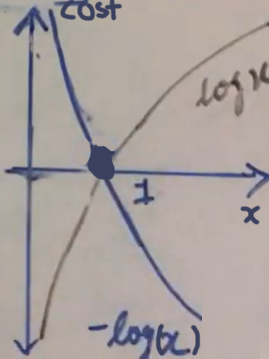

## Gradient Descent 
algo to minimise the cost function 

`defining terms`

$ W = \begin{bmatrix}w_1 \\ w_2 \\ . \\ . \\ w_n \end{bmatrix}_{ n x 1}$ ......... initialize with zeros

### $ŷ = A $

`cost function`

$ cost =  L = - [ y*log(ŷ) + (1 - y)*log(1 - ŷ) ] $, *J(Θ) for 1 observation out of m*

`we differentiate cost against weight for each observation, that is varying the denominator dCost/dW1, dCost/dW2 ...`

$dW = \frac{\partial COST }{\partial W} = ( ŷ - y )*X^T $ ...... shape (1 x n) 

`we differentiate cost against bias for each observation, that is varying the denominator dCost/dB1, dCost/dB2 ...`

$dB = \frac{\partial COST }{\partial B} = ( ŷ - y ) $

`deduct a small value to constantly update cost till we find the optimal W, where cost is at the global minimum`

$W = W - \alpha * dW^T $

$B = B - \alpha * dB $

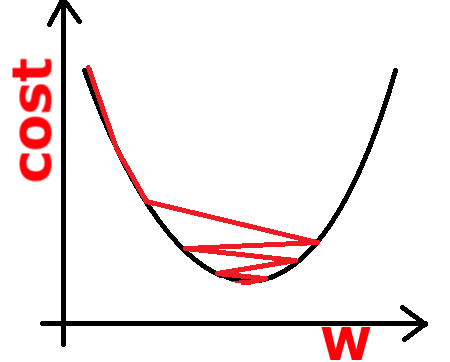

In [19]:
def model(X, Y, learning_rate, iterations):
    
    m = X_train.shape[1] #no of samples/rows
    n = X_train.shape[0] #no of features
    
    W = np.zeros((n,1))
    B = 0
    
    cost_list = []
    
    #keep updating W and B so that we have a hypothesis where cost is minimised
    for i in range(iterations):
        
        Z = np.dot(W.T, X) + B 
        A = sigmoid(Z) # A = ŷ = h_Θ(x) = \sigma ( W^T*X + b ) 
        
        # cost function
        cost = -(1/m)*np.sum( Y*np.log(A) + (1-Y)*np.log(1-A))
        
        # Gradient Descent
        dW = (1/m)*np.dot(A-Y, X.T)
        dB = (1/m)*np.sum(A - Y)
        
        W = W - learning_rate*dW.T #transpose to get it to n*1
        B = B - learning_rate*dB
        
        # Keeping track of our cost function value
        cost_list.append(cost)
        
        if(i%(iterations/10) == 0):
            print("cost after ", i, "iteration is : ", cost)
        
    return W, B, cost_list
        

In [14]:
iterations = 100000
learning_rate = 0.0015
W, B, cost_list = model(X_train, Y_train, learning_rate = learning_rate, iterations = iterations)

cost after  0 iteration is :  0.6931471805599454
cost after  10000 iteration is :  0.49652777693895306
cost after  20000 iteration is :  0.46674868550666
cost after  30000 iteration is :  0.45687787762434423
cost after  40000 iteration is :  0.45288994293089646
cost after  50000 iteration is :  0.4509326025222643
cost after  60000 iteration is :  0.4497708749009468
cost after  70000 iteration is :  0.4489640829216279
cost after  80000 iteration is :  0.44834126966124827
cost after  90000 iteration is :  0.44783045246935776


### Cost vs Iteration
Plotting graph to see if Cost Function is decreasing or not

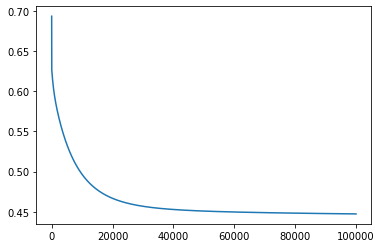

In [15]:
plt.plot(np.arange(iterations), cost_list)
plt.show()

# Testing Model Accuracy

In [16]:
def accuracy(X, Y, W, B):
    
    Z = np.dot(W.T, X) + B
    A = sigmoid(Z)
    
    A = A > 0.5
    
    A = np.array(A, dtype = 'int64')
    
    acc = (1 - np.sum(np.absolute(A - Y))/Y.shape[1])*100
    
    print("Accuracy of the model is : ", round(acc, 2), "%")

In [17]:
accuracy(X_test, Y_test, W, B)

Accuracy of the model is :  91.39 %
